In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import scipy

# Test 1: Two Level Capacitively Coupled iSwap

##### Relevant Unit Conversions
$10^9hz=1ghz, 1s=10^9 ns, 1s=10^6\mu s$

In [2]:
π = np.pi
µs_to_ns = 1e3

### States
$|g\rangle=(1,0)^T$, $|e\rangle=(0,1)^T$

In [3]:
g_state = qt.basis(2, 0)
e_state = qt.basis(2, 1)

### Operators
$a,a^\dagger, b, b^\dagger$ 

In [4]:
a = qt.tensor(qt.destroy(2), qt.qeye(2)) #lower first qubit
adag = a.dag() #raise first qubit
b = qt.tensor(qt.qeye(2), qt.destroy(2)) #loser second qubit
bdag = b.dag() #raise second qubit

gg_proj = qt.tensor(g_state, g_state).proj()
ge_proj = qt.tensor(g_state, e_state).proj()
eg_proj = qt.tensor(e_state, g_state).proj()
ee_proj = qt.tensor(e_state, e_state).proj()

### Hamiltonian
$H/\hbar = {\frac{\omega_1}{2} a^\dagger a + \frac{\omega_2}{2} b^\dagger b } + g(a^\dagger b + b^\dagger a).$

In [5]:
def hamiltonian(omega_1, omega_2, g):
    t1 = omega_1 / 2 * adag * a
    t2 = omega_2 / 2 * bdag * b
    t3 = g * ((adag * b) + (bdag * a))
    return t1 + t2 + t3

### Two Level Plotting Functions (for 4 initial wave functions)

In [6]:
def plot_2level_result(time_evolution_1, time_evolution_2, time_evolution_3, time_evolution_4):
    gg_pop_1 = qt.expect(gg_proj, time_evolution_1.states)
    ge_pop_1 = qt.expect(ge_proj, time_evolution_1.states)
    eg_pop_1 = qt.expect(eg_proj, time_evolution_1.states)
    ee_pop_1 = qt.expect(ee_proj, time_evolution_1.states)

    gg_pop_2 = qt.expect(gg_proj, time_evolution_2.states)
    ge_pop_2 = qt.expect(ge_proj, time_evolution_2.states)
    eg_pop_2 = qt.expect(eg_proj, time_evolution_2.states)
    ee_pop_2 = qt.expect(ee_proj, time_evolution_2.states)

    gg_pop_3 = qt.expect(gg_proj, time_evolution_3.states)
    ge_pop_3 = qt.expect(ge_proj, time_evolution_3.states)
    eg_pop_3 = qt.expect(eg_proj, time_evolution_3.states)
    ee_pop_3 = qt.expect(ee_proj, time_evolution_3.states)

    gg_pop_4 = qt.expect(gg_proj, time_evolution_4.states)
    ge_pop_4 = qt.expect(ge_proj, time_evolution_4.states)
    eg_pop_4 = qt.expect(eg_proj, time_evolution_4.states)
    ee_pop_4 = qt.expect(ee_proj, time_evolution_4.states)
    
    fig, ax = plt.subplots(2, 2, tight_layout=True, figsize=(12,9))
    ax[0][0].plot(t_vec * µs_to_ns, ge_pop_1, label="ge")
    ax[0][0].plot(t_vec * µs_to_ns, eg_pop_1, label="eg")
    ax[0][0].plot(t_vec * µs_to_ns, gg_pop_1, label="gg")
    ax[0][0].plot(t_vec * µs_to_ns, ee_pop_1, label="ee")
    ax[0][0].legend()
    ax[0][0].set_xlabel('Time, $t$ [ns]')
    ax[0][0].set_ylabel(r'Population, $P_{mn}$')
    ax[0][0].set_title('$\psi_0 = gg$')

    ax[1][0].plot(t_vec * µs_to_ns, ge_pop_2, label="ge")
    ax[1][0].plot(t_vec * µs_to_ns, eg_pop_2, label="eg")
    ax[1][0].plot(t_vec * µs_to_ns, gg_pop_2, label="gg")
    ax[1][0].plot(t_vec * µs_to_ns, ee_pop_2, label="ee")
    ax[1][0].legend()
    ax[1][0].set_xlabel('Time, $t$ [ns]')
    ax[1][0].set_ylabel(r'Population, $P_{mn}$')
    ax[1][0].set_title('$\psi_0 = ge$')

    ax[0][1].plot(t_vec * µs_to_ns, ge_pop_3, label="ge")
    ax[0][1].plot(t_vec * µs_to_ns, eg_pop_3, label="eg")
    ax[0][1].plot(t_vec * µs_to_ns, gg_pop_3, label="gg")
    ax[0][1].plot(t_vec * µs_to_ns, ee_pop_3, label="ee")
    ax[0][1].legend()
    ax[0][1].set_xlabel('Time, $t$ [ns]')
    ax[0][1].set_ylabel(r'Population, $P_{mn}$')
    ax[0][1].set_title('$\psi_0 = eg$')

    ax[1][1].plot(t_vec * µs_to_ns, ge_pop_4, label="ge")
    ax[1][1].plot(t_vec * µs_to_ns, eg_pop_4, label="eg")
    ax[1][1].plot(t_vec * µs_to_ns, gg_pop_4, label="gg")
    ax[1][1].plot(t_vec * µs_to_ns, ee_pop_4, label="ee")
    ax[1][1].legend()
    ax[1][1].set_xlabel('Time, $t$ [ns]')
    ax[1][1].set_ylabel(r'Population, $P_{mn}$')
    ax[1][1].set_title('$\psi_0 = ee$')

    fig.suptitle('iSWAP gate', fontsize=12)
    plt.show()

## On Resonance (On State in Theory)

In [7]:
omega = 2*π * 6000 #6 Ghz converted to microsecond timescale
g = 2*π * 8

h_onres = hamiltonian(omega_1=omega, omega_2=omega, g=g)

psi1 = qt.tensor(g_state, g_state)
psi2 = qt.tensor(g_state, e_state)
psi3 = qt.tensor(e_state, g_state)
psi4 = qt.tensor(e_state, e_state)

t_start = 0
t_end = 3 * π / (2 * g)
t_vec = np.linspace(t_start, t_end, 601)

### Solve

In [8]:
time_evolution_1 = qt.mesolve(h_onres, psi1, t_vec, [], [])
time_evolution_2 = qt.mesolve(h_onres, psi2, t_vec, [], [])
time_evolution_3 = qt.mesolve(h_onres, psi3, t_vec, [], [])
time_evolution_4 = qt.mesolve(h_onres, psi4, t_vec, [], [])

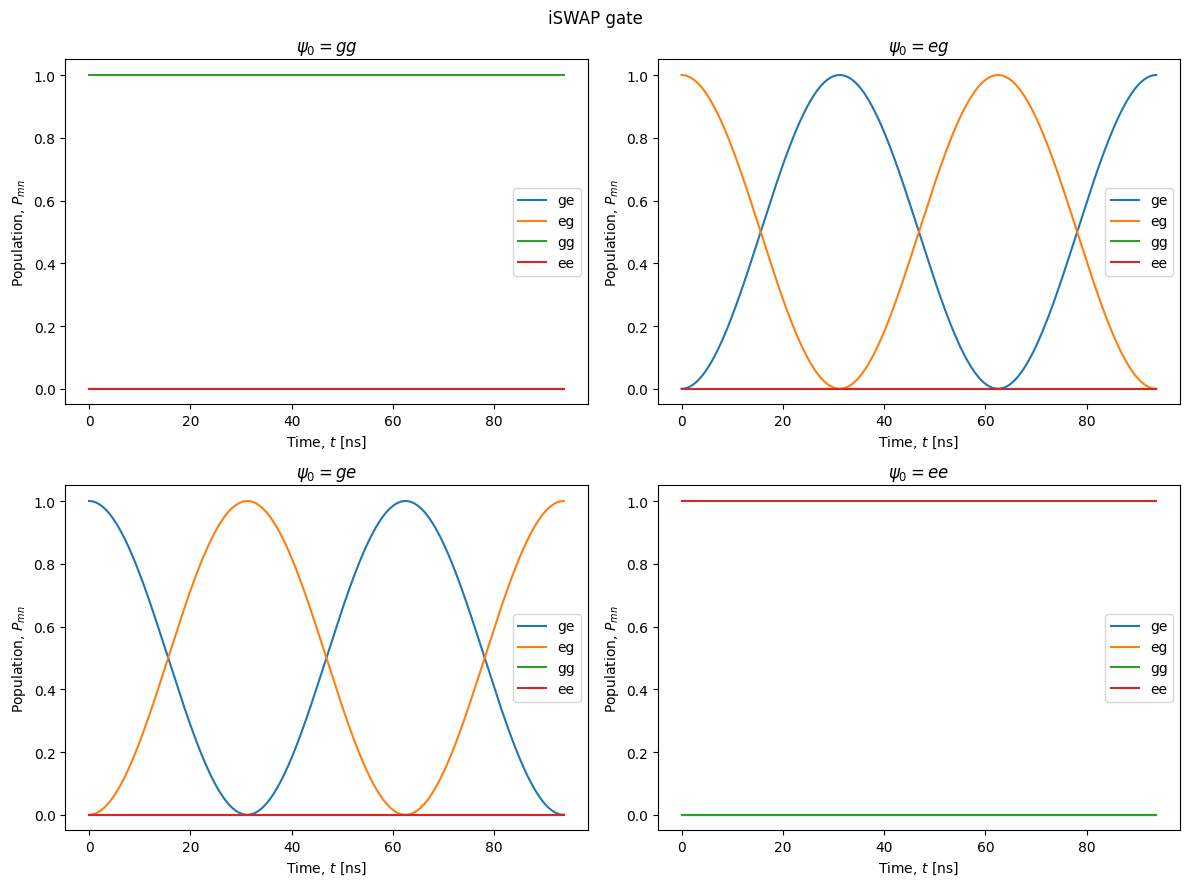

In [9]:
plot_2level_result(time_evolution_1, time_evolution_2, time_evolution_3, time_evolution_4)

## Slightly Detuned (On State in Practice)

In [10]:
omega1 = 2*π * 6000 #6 Ghz converted to microsecond timescale
detuning = 10 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
g = 2*π * 8

h_onres = hamiltonian(omega_1=omega1, omega_2=omega2, g=g)

psi1 = qt.tensor(g_state, g_state)
psi2 = qt.tensor(g_state, e_state)
psi3 = qt.tensor(e_state, g_state)
psi4 = qt.tensor(e_state, e_state)

t_start = 0
t_end = 3 * π / (2 * g)
t_vec = np.linspace(t_start, t_end, 601)

In [11]:
time_evolution_1 = qt.mesolve(h_onres, psi1, t_vec, [], [])
time_evolution_2 = qt.mesolve(h_onres, psi2, t_vec, [], [])
time_evolution_3 = qt.mesolve(h_onres, psi3, t_vec, [], [])
time_evolution_4 = qt.mesolve(h_onres, psi4, t_vec, [], [])

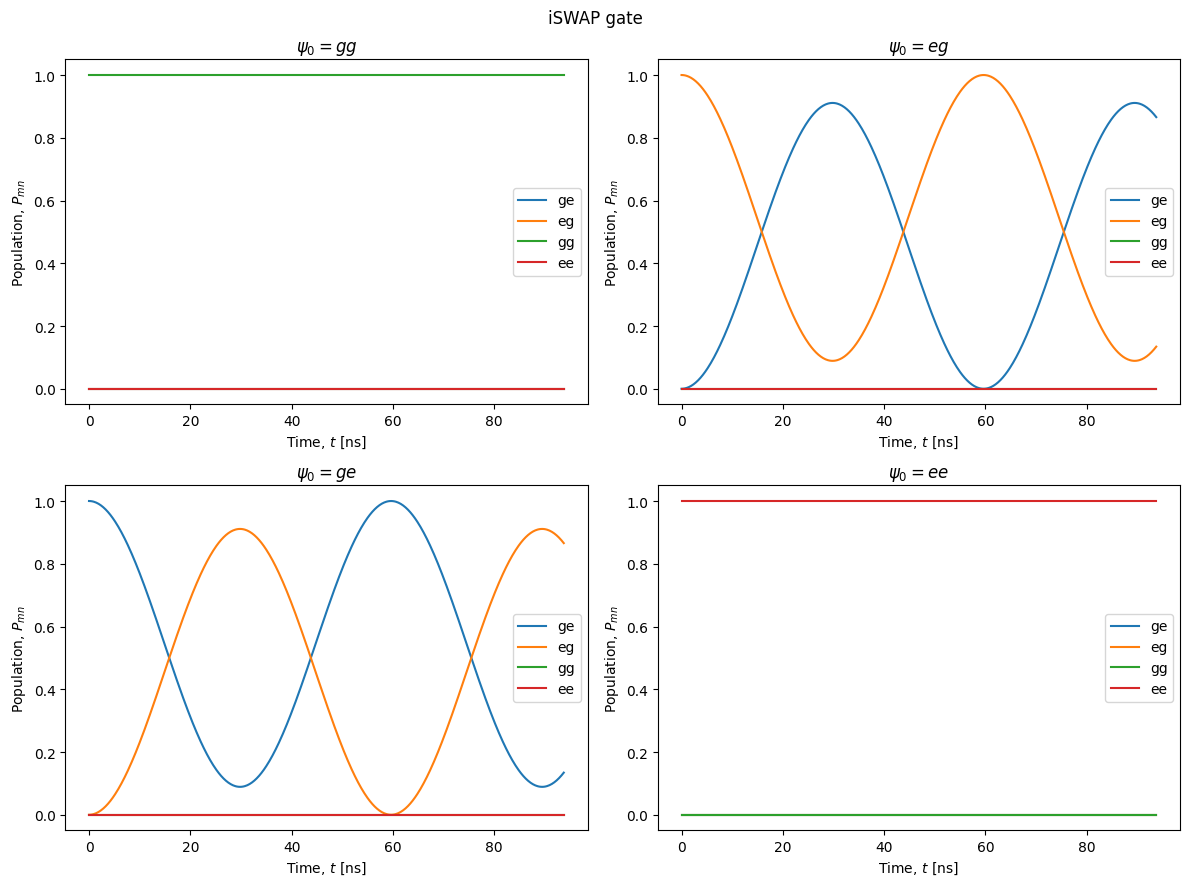

In [12]:
plot_2level_result(time_evolution_1, time_evolution_2, time_evolution_3, time_evolution_4)

## Large Detuning (Off State)

In [13]:
omega1 = 2*π * 6000 #6 Ghz converted to microsecond timescale
detuning = 500 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
g = 2*π * 8

h_onres = hamiltonian(omega_1=omega1, omega_2=omega2, g=g)

psi1 = qt.tensor(g_state, g_state)
psi2 = qt.tensor(g_state, e_state)
psi3 = qt.tensor(e_state, g_state)
psi4 = qt.tensor(e_state, e_state)

t_start = 0
t_end = 3 * π / (2 * g)
t_vec = np.linspace(t_start, t_end, 601)

In [14]:
time_evolution_1 = qt.mesolve(h_onres, psi1, t_vec, [], [])
time_evolution_2 = qt.mesolve(h_onres, psi2, t_vec, [], [])
time_evolution_3 = qt.mesolve(h_onres, psi3, t_vec, [], [])
time_evolution_4 = qt.mesolve(h_onres, psi4, t_vec, [], [])

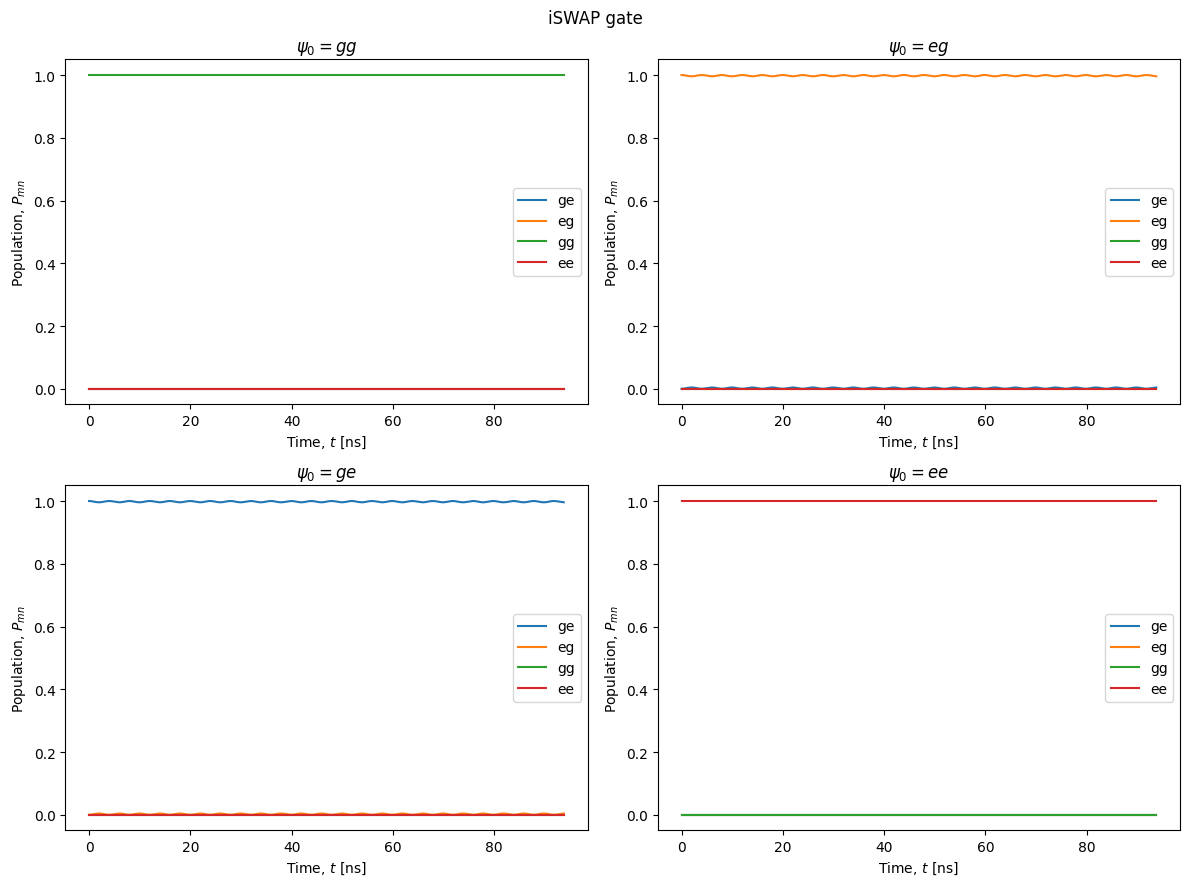

In [15]:
plot_2level_result(time_evolution_1, time_evolution_2, time_evolution_3, time_evolution_4)

##### expected result: generalized rabi oscillations don't exactly reach south pole, returns to the north pole with a different picked up phase, no impact on gg, ee initial states, large enough detuning-- lack of energy conservation leads to no oscillations at all